# Imports

In [22]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [23]:
import numpy as np
from scipy.constants import c, elementary_charge
import pandas as pd
import pickle as pkl
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import math
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = [24,16] # bigger figures
from matplotlib import style
style.use('fivethirtyeight')

In [24]:
# import package
# installed via pip
from emtracks.particle import trajectory_solver # main solver object
from emtracks.conversions import one_gev_c2_to_kg # conversion for q factor (transverse momentum estimate)
from emtracks.tools import *#InitConds # initial conditions namedtuple
from emtracks.mapinterp import get_df_interp_func  # factory function for creating Mu2e DS interpolation function
from emtracks.Bdist import get_B_df_distorted

### Directories

In [25]:
testdir = "/home/darren/Desktop/plots/"
datadir = "/home/shared_data/"
plotdir = datadir+"plots/randomphi/"
mapdir = datadir+"Bmaps/"

In [26]:
df_Mu2e = pd.read_pickle(mapdir+"Mu2e_DSMap_V13.p")

### Define Distorted B Field

In [27]:
B_Mu2e_func = get_df_interp_func(mapdir+"Mu2e_DSMap_V13.p", gauss=False)
#a = df_Mu2e
a = pd.read_pickle(mapdir+"Mu2e_DSMap_V13.p")
start_point = 3
end_point = 14
initial_B = 50 #(rougly 1% distortion at z = 3.0, 0% at z = 14)
final_B = 0
#b = df_Mu2e_dis
b = get_B_df_distorted(a, v="0", Bz0 = initial_B, Bzf = 0, z0 = start_point, zf = end_point)
B_Mu2e_dis = get_df_interp_func(df=b, gauss=False)

In [32]:
#df2 is dataframe with graded field
df2 = a.copy()

df2['Bx'] = b['Bx'] - a['Bx']
df2['By'] = b['By'] - a['By']
df2['Bz'] = b['Bz'] - a['Bz']
df2['R'] = b['R'] - a['R']
df2['Phi'] = b['Phi'] - a['Phi']
df2['Bphi'] = b['Bphi'] - a['Bphi']
df2['Br'] = b['Br'] - a['Br']

delta = 0.05
xcenter = 0.054093382
ycenter = 0.03873037
#limit the dataframe to x and y plusminus delta
mask = (df2['X'] < xcenter+delta) & (df2['X'] > xcenter-delta)\
& (df2['Y'] < xcenter+delta) & (df2['Y'] > xcenter-delta)

df3 = df2[mask]
df4 = a[mask]
df5 = b[mask]
print(df2[mask])

df['X'].unique()

             X      Y       Z        Bx        By         Bz    R  Phi  \
2501842  0.025  0.025   3.071  0.056818  0.056818  49.677273  0.0  0.0   
2501843  0.025  0.025   3.096  0.056818  0.056818  49.563636  0.0  0.0   
2501844  0.025  0.025   3.121  0.056818  0.056818  49.450000  0.0  0.0   
2501845  0.025  0.025   3.146  0.056818  0.056818  49.336364  0.0  0.0   
2501846  0.025  0.025   3.171  0.056818  0.056818  49.222727  0.0  0.0   
...        ...    ...     ...       ...       ...        ...  ...  ...   
2655532  0.100  0.100  15.971  0.227273  0.227273  -8.959091  0.0  0.0   
2655533  0.100  0.100  15.996  0.227273  0.227273  -9.072727  0.0  0.0   
2655534  0.100  0.100  16.021  0.227273  0.227273  -9.186364  0.0  0.0   
2655535  0.100  0.100  16.046  0.227273  0.227273  -9.300000  0.0  0.0   
2655536  0.100  0.100  16.071  0.227273  0.227273  -9.413636  0.0  0.0   

                 Bphi        Br  
2501842  3.194600e-11  0.080353  
2501843  3.194600e-11  0.080353  
2501844  

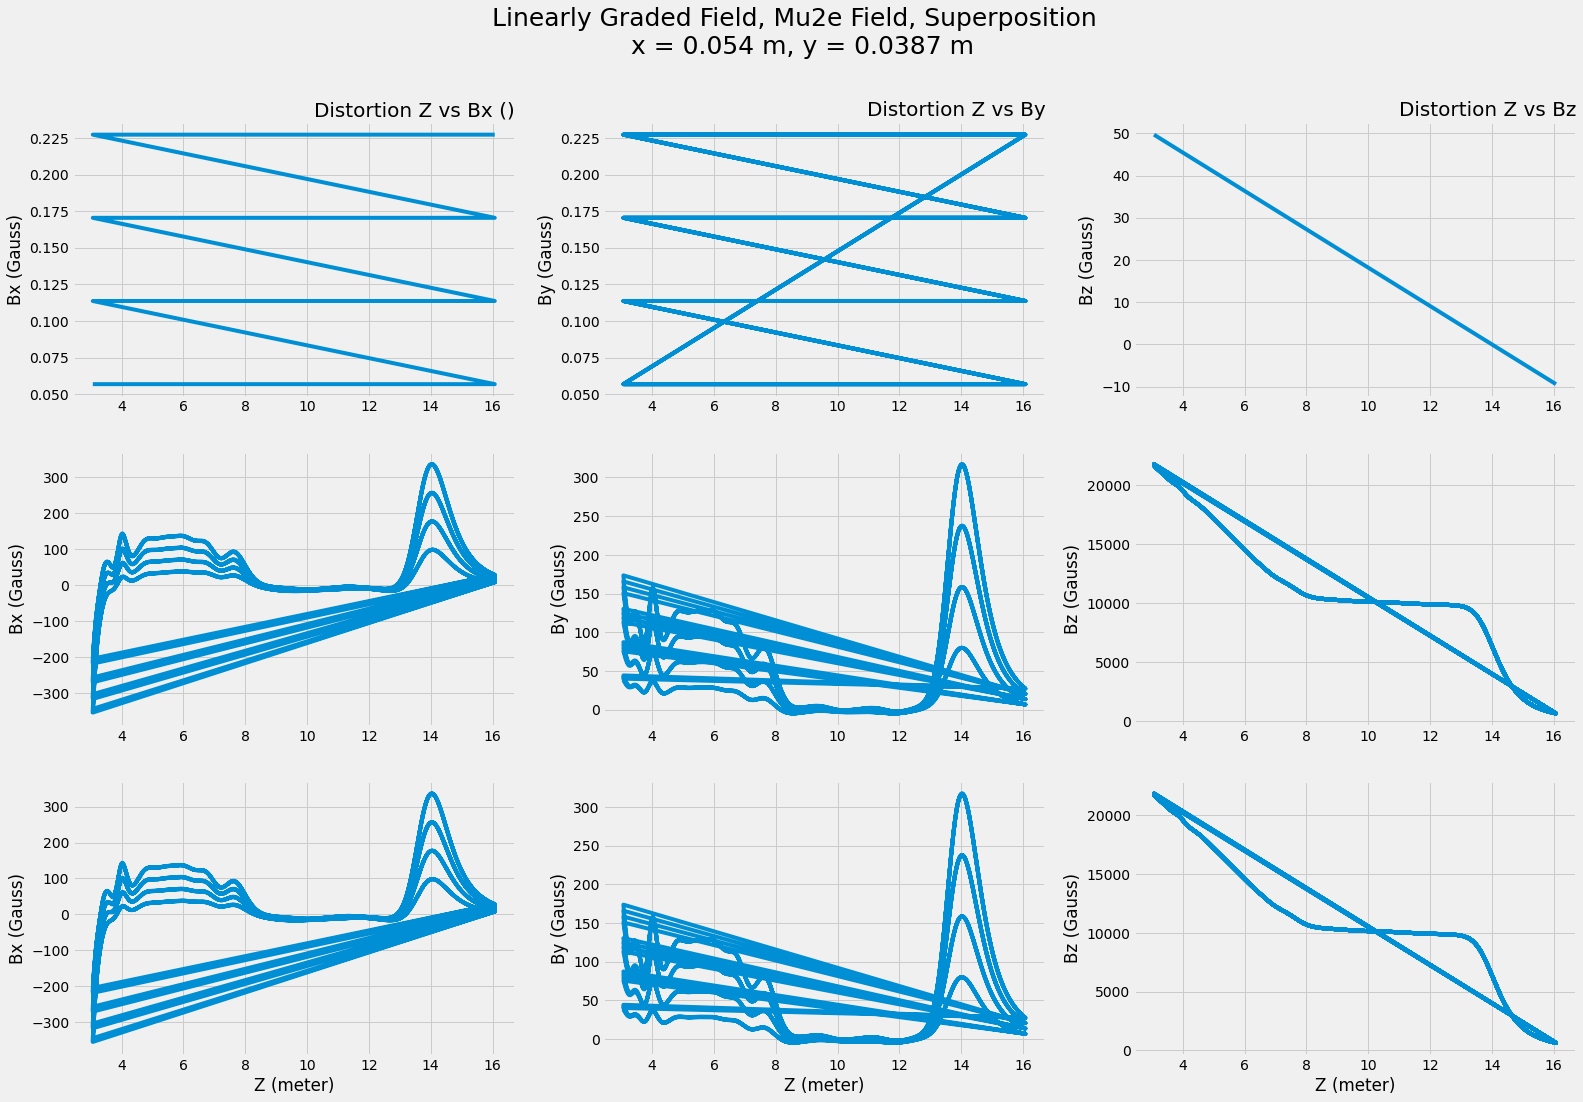

In [30]:
fig = plt.figure()
plt.title('hello')
ax1 = plt.subplot2grid((3,3), (0,0), rowspan=1, colspan=1)
ax2 = plt.subplot2grid((3,3), (0,1), rowspan=1, colspan=1)
ax3 = plt.subplot2grid((3,3), (0,2), rowspan=1, colspan=1)
ax4 = plt.subplot2grid((3,3), (1,0), rowspan=1, colspan=1)
ax5 = plt.subplot2grid((3,3), (1,1), rowspan=1, colspan=1)
ax6 = plt.subplot2grid((3,3), (1,2), rowspan=1, colspan=1)
ax7 = plt.subplot2grid((3,3), (2,0), rowspan=1, colspan=1)
ax8 = plt.subplot2grid((3,3), (2,1), rowspan=1, colspan=1)
ax9 = plt.subplot2grid((3,3), (2,2), rowspan=1, colspan=1)

x, y = df3['Z'], df3['Bx']
ax1.plot(x,y)
ax1.set_title('Distortion Z vs Bx ()', fontsize = 20, loc = 'right')
ax1.set_ylabel('Bx (Gauss)')

x, y = df3['Z'], df3['By']
ax2.plot(x,y)
ax2.set_title('Distortion Z vs By', fontsize = 20, loc = 'right')
ax2.set_ylabel('By (Gauss)')

x, y = df3['Z'], df3['Bz']
ax3.plot(x,y)
ax3.set_title('Distortion Z vs Bz', fontsize = 20, loc = 'right')
ax3.set_ylabel('Bz (Gauss)')

x, y = df4['Z'], df4['Bx']
ax4.plot(x,y)
ax4.set_ylabel('Bx (Gauss)')
x, y = df4['Z'], df4['By']
ax5.plot(x,y)
ax5.set_ylabel('By (Gauss)')
x, y = df4['Z'], df4['Bz']
ax6.plot(x,y)
ax6.set_ylabel('Bz (Gauss)')

x, y = df5['Z'], df5['Bx']
ax7.plot(x,y)
ax7.set_xlabel('Z (meter)')
ax7.set_ylabel('Bx (Gauss)')
x, y = df5['Z'], df5['By']
ax8.plot(x,y)
ax8.set_xlabel('Z (meter)')
ax8.set_ylabel('By (Gauss)')
x, y = df5['Z'], df5['Bz']
ax9.plot(x,y)
ax9.set_xlabel('Z (meter)')
ax9.set_ylabel('Bz (Gauss)')

fig.suptitle("Linearly Graded Field, Mu2e Field, Superposition \n x = 0.054 m, y = 0.0387 m", fontsize = 25)
fig.savefig(plotdir+'Linearly Graded Field (z03,zf14,bz0=50--).png')



In [ ]:
m = (final_B - initial_B) / (end_point - start_point)
n = 50
n1 = (end_point - start_point) / n
t = np.arange(start_point, end_point, n1)
x = plt.plot(t, ((t - start_point)*m) + initial_B)
plt.title("Distortion")
plt.xlabel("Z (meters)")
plt.ylabel("B (gauss)")

# Functions

In [9]:
def get_random_phi(N):   #change left boundary to math.pi work with those values later - if it works in some cases, stick with the stuff that works then go back
    # calls np.random, returns np.array with N randomized phi values
    phis = np.random.uniform(0, 2*math.pi, N) # uniform distribution between 0 and 2pi
    return phis

In [10]:
def run_solver(phi, N_calc, field, xnaught, ynaught, znaught):
    ic_Mu2e = InitConds(t0=0., tf=4e-8, N_t=N_calc,
                    x0=xnaught, y0=ynaught, z0=znaught,
                    p0=104.96, theta0=np.pi/3, phi0=phi)
    e_solver = trajectory_solver(ic_Mu2e, B_func=field, bounds=bounds_Mu2e)
    sol = e_solver.solve_trajectory(verbose = False, atol=1e-8, rtol=1e-8) # high tolerance so it runs quickly for testing
    df = e_solver.dataframe
    df['r'] = ((df['x']-xnaught)**2 + (df['y']-ynaught)**2)**(1/2)
    return df

In [11]:
def find_track_at_z(df, z): 
    delta = 10/4001   #approximate z range divided by number of points
    mask = (df.z < z + delta) & (df.z > z - delta)
    
    while (len(df.z[mask]) > 2):
        delta = delta / 2
        mask = (df.z < z + delta) & (df.z > z - delta)
    while (len(df.z[mask]) == 0):
        delta = delta*4
        mask = (df.z < z + delta) & (df.z > z - delta)
       
    df2 = df.loc[mask]
    df2 = df2.apply(pd.to_numeric)
    return (df2.iloc[0]['x'], df2.iloc[0]['y'], df2.iloc[0]['z'], df2.iloc[0]['t'], df2.iloc[0]['r'])

In [12]:
def plot_impact_at_calorimeter(ts, phis, rs, xs, ys, zs, output_directory):
    
    fig = plt.figure()
    plt.scatter(xs, ys, c = phis)
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title("Y as a fn of X")
    max_coord = 1.25*np.max(abs(np.array([xs,ys])))
    plt.xlim(-max_coord, max_coord)
    plt.ylim(-max_coord, max_coord)
    fig.savefig(plotdir+output_directory+"Scatter_y_vs_x.pdf")
    fig.savefig(plotdir+output_directory+"Scatter_y_vs_x.png")
    
    fig2 = plt.figure()
    plt.scatter(phis, xs)
    plt.xlabel("phi_values (rad)")
    plt.ylabel("x coordinate")
    plt.title("X as a fn of phi")
    #plt.xlim(-6, 6)
    #plt.ylim(-2, 2)
    fig2.savefig(plotdir+output_directory+"Scatter_x_vs_phi.pdf")
    fig2.savefig(plotdir+output_directory+"Scatter_x_vs_phi.png")
    
    fig3 = plt.figure()
    plt.scatter(phis, ys)
    plt.xlabel("phi_values (rad)")
    plt.ylabel("y coordinate")
    plt.title("Y as a fn of phi")
    #plt.xlim(-6, 6)
    #plt.ylim(-2, 2)
    fig3.savefig(plotdir+output_directory+"Scatter_y_vs_phi.pdf")
    fig3.savefig(plotdir+output_directory+"Scatter_y_vs_phi.png")

    fig4 = plt.figure()
    x = xs
    num_bins = 50
    n, bins, patches = plt.hist(x, num_bins, facecolor='blue')
    plt.xlabel('xcoord')
    plt.ylabel('number of occurences')
    plt.title('Histogram of x-coord')
    fig4.savefig(plotdir+output_directory+"Histogram_x.pdf")
    fig4.savefig(plotdir+output_directory+"Histogram_x.png")
    
    fig5 = plt.figure()
    y = ys
    num_bins = 50
    n, bins, patches = plt.hist(y, num_bins, facecolor='blue')
    plt.xlabel('ycoord')
    plt.ylabel('number of occurences')
    plt.title('Histogram of y-coord')
    fig5.savefig(plotdir+output_directory+"Histogram_y.pdf")
    fig5.savefig(plotdir+output_directory+"Histogram_y.png")
    
    fig6 = plt.figure()
    r = rs
    num_bins = 50
    n, bins, patches = plt.hist(r, num_bins, facecolor='blue')
    plt.xlabel('radius')
    plt.ylabel('number of occurences')
    plt.title('Histogram of R')
    fig6.savefig(plotdir+output_directory+"Histogram_R.pdf")
    fig6.savefig(plotdir+output_directory+"Histogram_R.png")
    
    actualrad = ((((max(xs) - min(xs)) / 2) + ((max(ys) - min(ys)) / 2)) / 2)
    print ('actual radius: ' + str(actualrad))

In [13]:
def plotjoint(x, y, output_directory):
    x1, x2 = x[2], y[2]
    num_bins = 20

    m1 = np.mean(x1)
    std1 = np.std(x1)
    m2 = np.mean(x2)
    std2 = np.std(x2)

    fig1 = plt.figure()

    plt.hist(x1, alpha = 0.3, bins = num_bins, facecolor='blue', label = 'Mu2e Field')
    plt.hist(x2, alpha = 0.8, bins = num_bins, facecolor='orange', label = 'Graded Field')

    plt.legend()
    plt.legend()

    plt.text(0.3, 21, '\u03BC = '+str(round(np.mean(x1), 5)), fontsize = 8)
    plt.text(0.3, 20.6, '\u03C3 = '+str(round(np.std(x1), 5)), fontsize = 8)
    plt.text(0.3, 20.2, '\u03BC graded = '+str(round(np.mean(x2), 5)), fontsize = 8)
    plt.text(0.3, 19.8, '\u03C3 graded = '+str(round(np.std(x2), 5)), fontsize = 8)

    plt.xlabel('Radius (meters)')
    plt.ylabel('Occurences')
    plt.title('Histogram of Radius At Z=13 Meters')  
    fig1.show
    fig1.savefig(plotdir+output_directory+"6-11/2Graded_radiushist500.pdf")
    #fig1.savefig(plotdir+output_directory+"6-11-2Graded_radiushist.png")

    #---------------
    x1, x2 = x[3], y[3]
    num_bins = 20
    m1 = np.mean(x1)
    std1 = np.std(x1)
    m2 = np.mean(x2)
    std2 = np.std(x2)

    fig2 = plt.figure()

    plt.hist(x1, alpha = 0.3, bins = num_bins, facecolor='blue',  label = 'normal')
    plt.hist(x2, alpha = 0.8, bins = num_bins, facecolor='orange',  label = 'graded')

    plt.legend()

    plt.text(0.2, 17, '\u03BC = '+str(round(np.mean(x1), 5)), fontsize = 8)
    plt.text(0.2, 16.5, '\u03C3 = '+str(round(np.std(x1), 5)), fontsize = 8)
    plt.text(0.2, 16, '\u03BC graded = '+str(round(np.mean(x2), 5)), fontsize = 8)
    plt.text(0.2, 15.5, '\u03C3 graded = '+str(round(np.std(x2), 5)), fontsize = 8)

    plt.xlabel('X (meters)')
    plt.ylabel('Occurences')
    plt.title('Histogram of X')  
    fig2.show
    fig2.savefig(plotdir+output_directory+"6-11/2Graded_xhist500.pdf")
    #fig2.savefig(plotdir+output_directory+"6-11-2Graded_xhist.pdf")


    #-----

    x1, x2 = x[4], y[4]
    num_bins = 20
    m1 = np.mean(x1)
    std1 = np.std(x1)
    m2 = np.mean(x2)
    std2 = np.std(x2)

    fig3 = plt.figure()

    plt.hist(x1, alpha = 0.3, bins = num_bins, facecolor='blue',  label = 'normal')
    plt.hist(x2, alpha = 0.8, bins = num_bins, facecolor='orange',  label = 'graded')

    plt.legend()

    plt.text(0.2, 16.5, '\u03BC = '+str(round(np.mean(x1), 5)), fontsize = 8)
    plt.text(0.2, 16, '\u03C3 = '+str(round(np.std(x1), 5)), fontsize = 8)
    plt.text(0.2, 15.5, '\u03BC graded = '+str(round(np.mean(x2), 5)), fontsize = 8)
    plt.text(0.2, 15, '\u03C3 graded = '+str(round(np.std(x2), 5)), fontsize = 8)

    plt.xlabel('Y (meters)')
    plt.ylabel('Occurences')
    plt.title('Histogram of X')  
    fig3.show
    fig3.savefig(plotdir+output_directory+"6-11/2Graded_yhist500.pdf")
    #fig3.savefig(plotdir+output_directory+"6-11-2Graded_yhist.pdf")
    

## First Run Function (No Graded Field)

In [14]:
def run(N, output_directory):
    phis = get_random_phi(N)
    ts = []
    xs = []
    ys = []
    zs = []
    rs = []
    # for each phi, run create solver object and save trajectory object
    for phi in phis:
        dataframe = run_solver(phi, 4001, B_Mu2e_func, 0.054094482, 0.03873037, 5.988900879) #second argument is how many steps in numerical integration
        x, y, z, t, r = find_track_at_z(dataframe,13)
        ts.append(t)
        xs.append(x)
        ys.append(y)
        zs.append(z)
        rs.append(r)
    # convert everything to numpy arrays
    ts = np.array(ts)
    xs = np.array(xs)
    ys = np.array(ys)
    zs = np.array(zs)
    rs = np.array(rs)
    # plot results (and save plots)
    plot_impact_at_calorimeter(ts, phis, rs, xs, ys, zs, output_directory)
    return (ts, phis, rs, xs, ys, zs)

actual radius: 0.3742778778834885


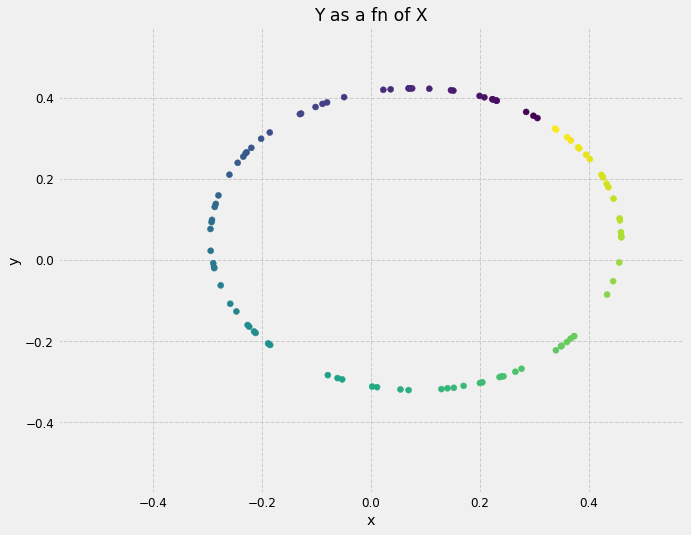

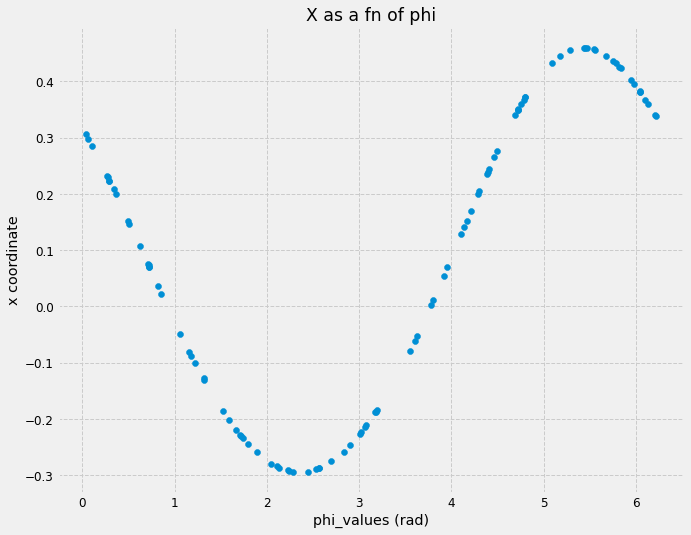

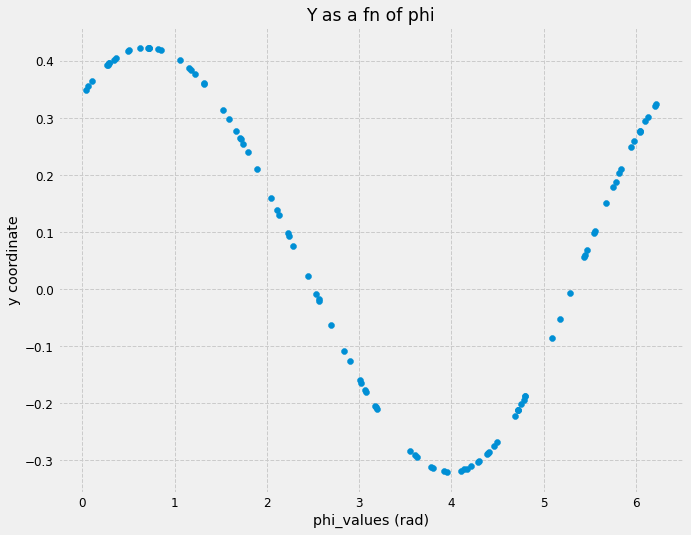

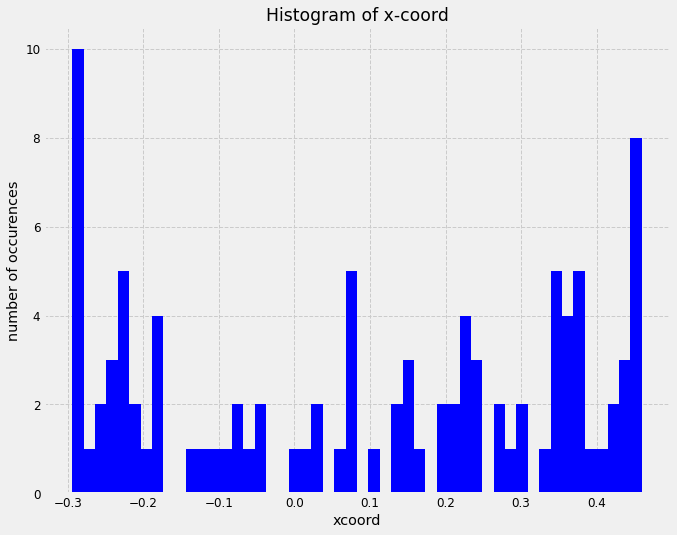

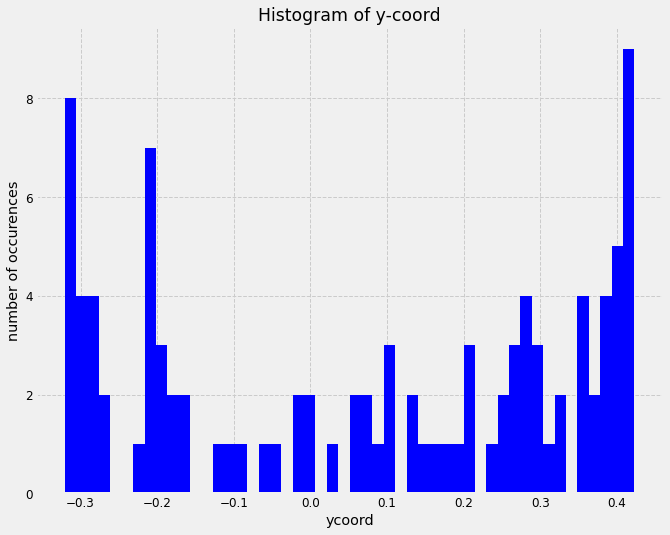

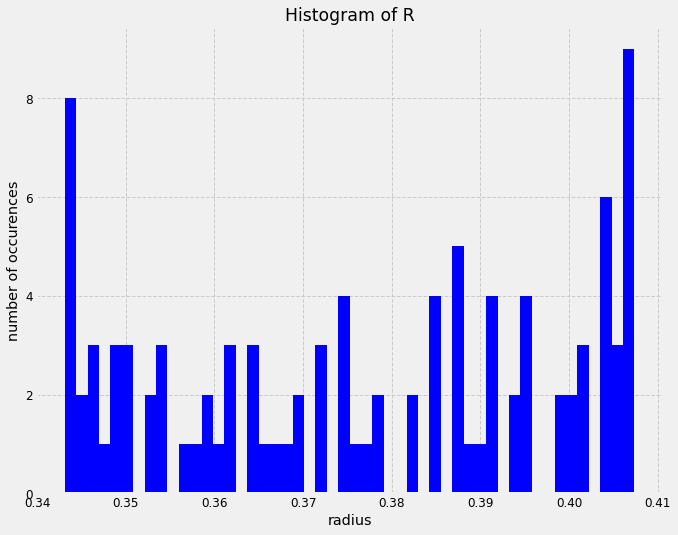

In [15]:
x = run(100, "run1/")
#np.save(x)

## Second Run Function (Graded Field)

In [16]:
def run2(N, output_directory):
    #phis = get_random_phi(N)
    ts = []
    xs = []
    ys = []
    zs = []
    rs = []
    # for each phi, run create solver object and save trajectory object
    for phi in phis:
        dataframe = run_solver(phi, 4001, B_Mu2e_dis, 0.054094482, 0.03873037, 5.988900879) #second argument is how many steps in numerical integration
        x, y, z, t, r = find_track_at_z(dataframe,13)
        ts.append(t)
        xs.append(x)
        ys.append(y)
        zs.append(z)
        rs.append(r)
    # convert everything to numpy arrays
    ts = np.array(ts)
    xs = np.array(xs)
    ys = np.array(ys)
    zs = np.array(zs)
    rs = np.array(rs)
    # plot results (and save plots)
    plot_impact_at_calorimeter(ts, phis, rs, xs, ys, zs, output_directory)
    return (ts, phis, rs, xs, ys, zs)
    

actual radius: 0.4676319156369117


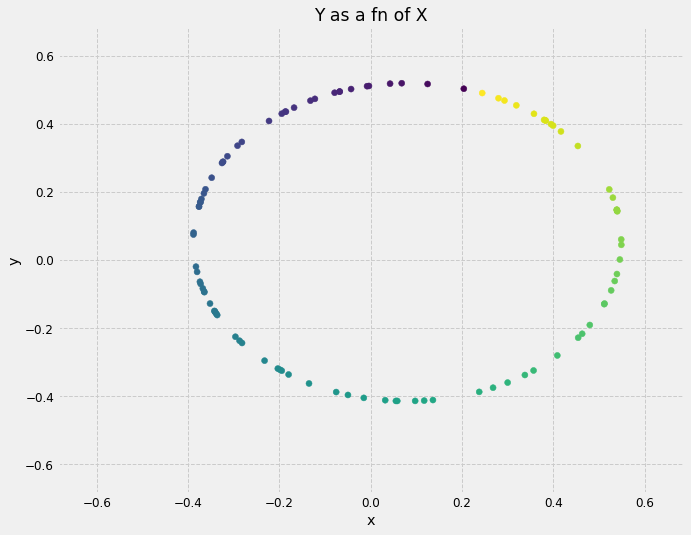

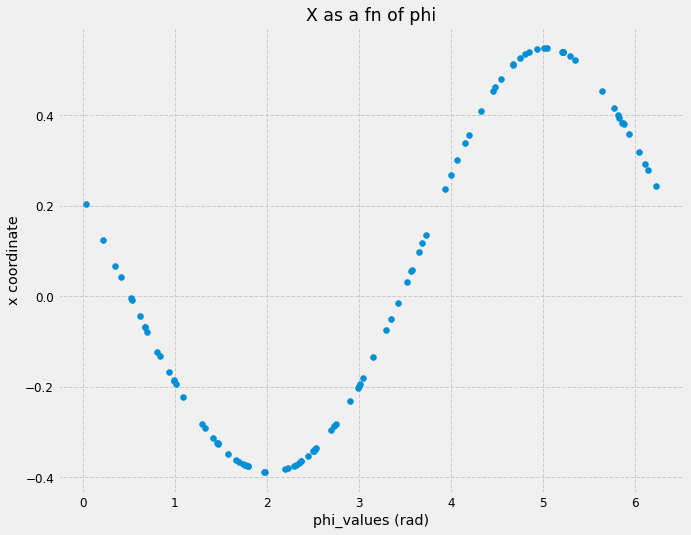

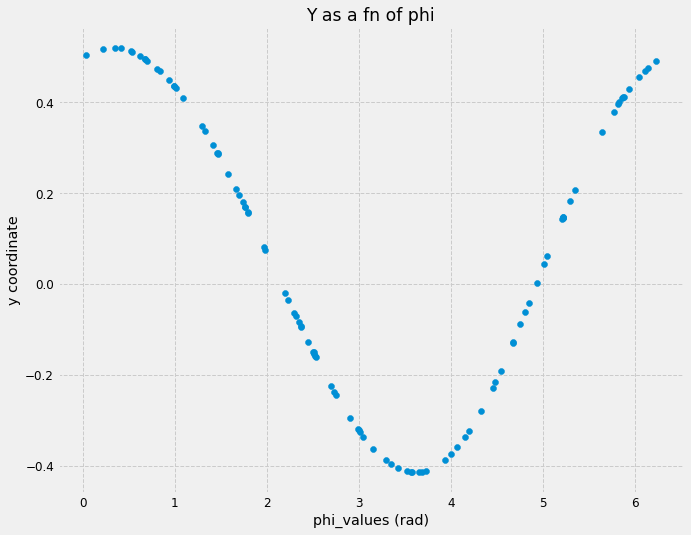

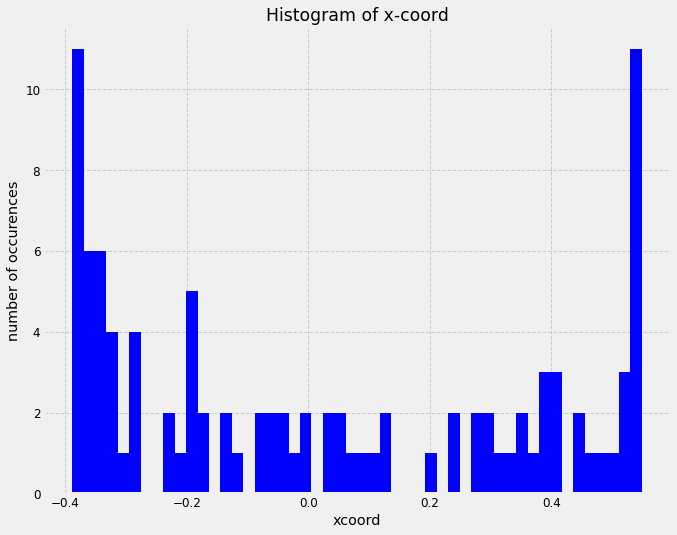

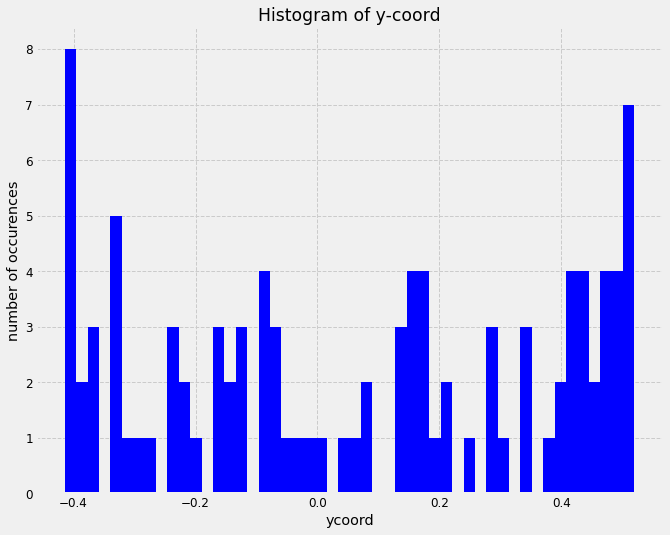

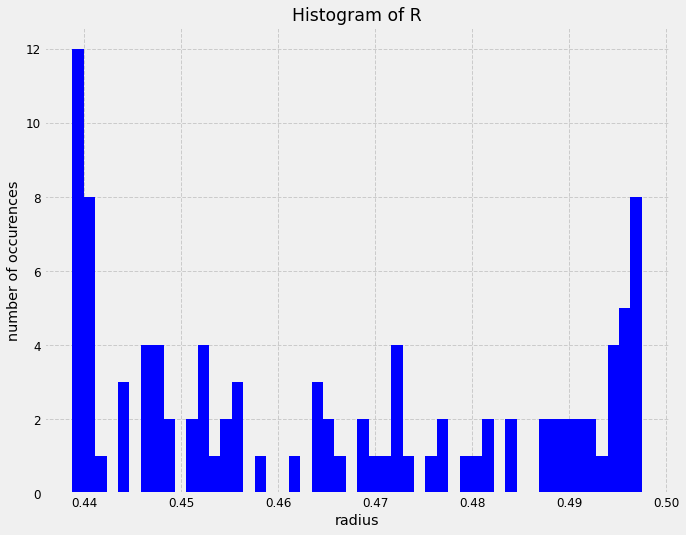

In [17]:
y = run2(100, '/run2')

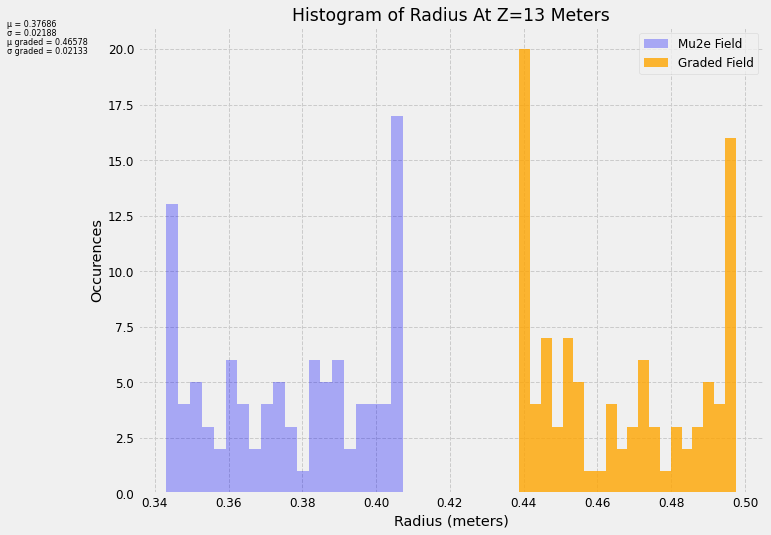

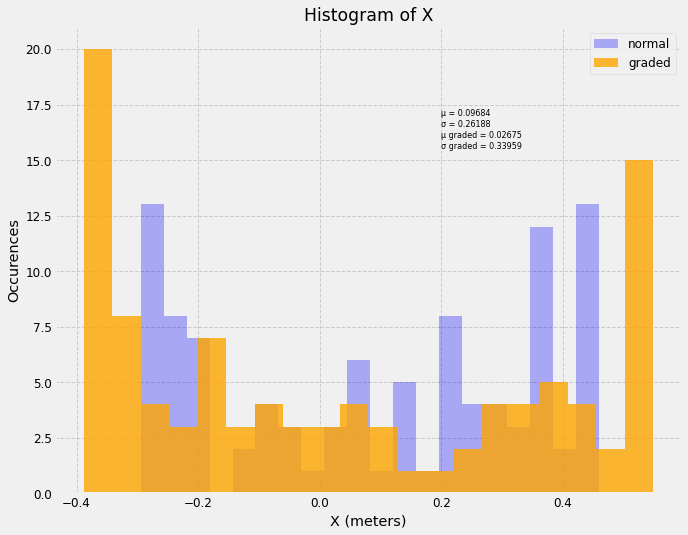

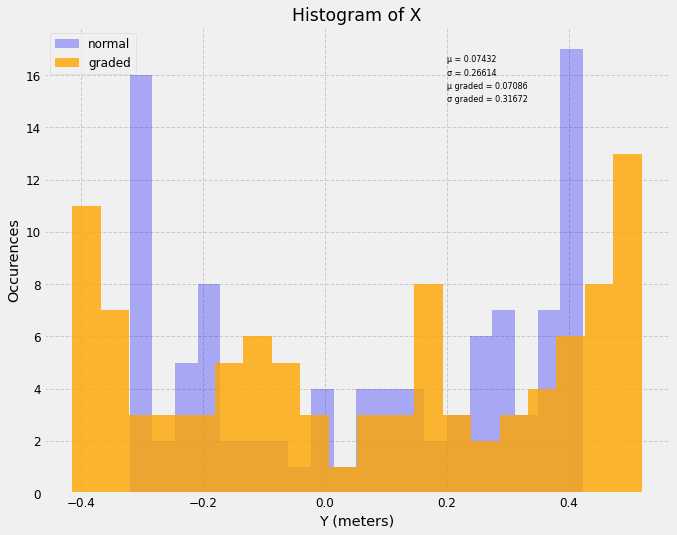

In [18]:
plotjoint(x, y, "")

In [ ]:
#x is regular, y is graded
x1, x2 = x[2], y[2]
num_bins = 20

m1 = np.mean(x1)
std1 = np.std(x1)
m2 = np.mean(x2)
std2 = np.std(x2)

fig = plt.figure()

plt.hist(x1, alpha = 0.3, bins = num_bins, facecolor='blue', label = 'Mu2e Field \n ')
plt.hist(x2, alpha = 0.8, bins = num_bins, facecolor='orange', label = 'Graded Field')

plt.legend()
plt.legend()

plt.text(0.3, 21, '\u03BC = '+str(round(np.mean(x1), 5)), fontsize = 8)
plt.text(0.3, 20.6, '\u03C3 = '+str(round(np.std(x1), 5)), fontsize = 8)
plt.text(0.3, 20.2, '\u03BC graded = '+str(round(np.mean(x2), 5)), fontsize = 8)
plt.text(0.3, 19.8, '\u03C3 graded = '+str(round(np.std(x2), 5)), fontsize = 8)

plt.xlabel('Radius (meters)')
plt.ylabel('Occurences')
plt.title('Histogram of Radius At Z=13 Meters')  
fig.show

In [ ]:
#x is regular, y is graded
x1, x2 = x[3], y[3]
num_bins = 20
m1 = np.mean(x1)
std1 = np.std(x1)
m2 = np.mean(x2)
std2 = np.std(x2)

fig = plt.figure()

plt.hist(x1, alpha = 0.3, bins = num_bins, facecolor='blue',  label = 'normal')
plt.hist(x2, alpha = 0.8, bins = num_bins, facecolor='orange',  label = 'graded')

plt.legend()


plt.text(0.2, 17, '\u03BC = '+str(round(np.mean(x1), 5)), fontsize = 8)
plt.text(0.2, 16.5, '\u03C3 = '+str(round(np.std(x1), 5)), fontsize = 8)
plt.text(0.2, 16, '\u03BC graded = '+str(round(np.mean(x2), 5)), fontsize = 8)
plt.text(0.2, 15.5, '\u03C3 graded = '+str(round(np.std(x2), 5)), fontsize = 8)

plt.xlabel('X (meters)')
plt.ylabel('Occurences')
plt.title('Histogram of X')  
fig.show

In [ ]:
#x is regular, y is graded
x1, x2 = x[4], y[4]
num_bins = 20
m1 = np.mean(x1)
std1 = np.std(x1)
m2 = np.mean(x2)
std2 = np.std(x2)

fig = plt.figure()

plt.hist(x1, alpha = 0.3, bins = num_bins, facecolor='blue',  label = 'normal')
plt.hist(x2, alpha = 0.8, bins = num_bins, facecolor='orange',  label = 'graded')

plt.legend()

plt.text(0.2, 16.5, '\u03BC = '+str(round(np.mean(x1), 5)), fontsize = 8)
plt.text(0.2, 16, '\u03C3 = '+str(round(np.std(x1), 5)), fontsize = 8)
plt.text(0.2, 15.5, '\u03BC graded = '+str(round(np.mean(x2), 5)), fontsize = 8)
plt.text(0.2, 15, '\u03C3 graded = '+str(round(np.std(x2), 5)), fontsize = 8)

plt.xlabel('Y (meters)')
plt.ylabel('Occurences')
plt.title('Histogram of Y')  
fig.show